In [1]:
import gym

# Trading Framework

This framework is developed based on Tito Ingargiola's amazing work on https://github.com/hackthemarket/gym-trading. 

In [8]:
import gym_trading
from gym_trading.envs.Q_learning import Q


First, define the address for the CSV data


In [9]:
csv = r"C:\Users\Henry\Documents\Python Stuff\Upwork Trial\Forex Ai\GBPUSD60.csv"

# Create a new OpenAI Gym environment with the customised Trading environment



 .initialise_simulator() must be invoked after **env.make('trading-v0')** . Within this function, provide these arguments:


* **csv**: Address of the data


* **ATR**: True/ False, (The only indicator available now)



* **trade_period**: (1 - 10), Holding period for each trades. *Default: 1*


* **train_split**: (0.0,1.0), Percentage of data set for training. *Default: 0.7*

In [10]:
env = gym.make('trading-v0')
env.initialise_simulator(csv, ATR=True, trade_period=5, train_split=0.7)

[2017-06-24 23:46:12,606] Making new env: trading-v0


Please invoke .initialise_simulator() method next to complete initialization


# States map

states_map is a discretized observation space bounded by the extreme values Return and ATR, with an interval of 0.5. For every new observation (Return, ATR) tuple pair, it is approximated to the closest pair on states_map. States_map corresponds to the row index of lookup_table

In [ ]:
env.sim.states

# Next, Create Q_learning framework

This framework wraps around the trading environment.

Arguments:

* **env**: gym_trading Environment

* **train_episodes**: Number of train episodes to update Q_table

* **learning_rate**: *Default: 0.2*

* **gamma**: *Default: 0.9* 

    Upon initializing, Q_learning has zeroed Q_table **lookup_table** and **states_map**
    
 


In [11]:
Q_learning = Q(env, train_episodes=1000, learning_rate=0.2, gamma=0.9)

Exception ignored in: <bound method Env.__del__ of <gym_trading.envs.trading_env.TradingEnv object at 0x0000022638FB7B00>>
Traceback (most recent call last):
  File "C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\gym\core.py", line 202, in __del__
    self.close()
  File "C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\gym\core.py", line 167, in close
    self.render(close=True)
  File "C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\gym\core.py", line 153, in render
    return self._render(mode=mode, close=close)
TypeError: _render() got an unexpected keyword argument 'mode'


# States_map
**states_map** is a discretized observation space bounded by the extreme values *Return* and *ATR*, with an interval of 0.5.
For every new observation *(Return, ATR) tuple pair*, it is approximated to the closest pair on **states_map**.  **States_map** corresponds to the row index of **lookup_table**


In [ ]:
Q_learning.states_map

# Q Table
**lookup_table** has row size the length of **states_map** and column size of 3 (actions (0,1,2).).

In [ ]:
Q_learning.lookup_table[Q_learning.lookup_table!=0]

All zero now, not trained yet

# Training

Filling up the Q Table

In [12]:
Q_learning.train()

Training period  2016-11-29 02:00:00 - 2017-03-24 09:00:00
End of Episode 1, Reward is -3.97371273713
End of Episode 2, Reward is -2.09791666667
End of Episode 3, Reward is -3.81331592689
End of Episode 4, Reward is -4.72756756757
End of Episode 5, Reward is -2.60238095238
End of Episode 6, Reward is -2.62326283988
End of Episode 7, Reward is -2.3204851752
End of Episode 8, Reward is -2.26017191977
End of Episode 9, Reward is -1.54694656489
End of Episode 10, Reward is -0.141666666666
End of Episode 11, Reward is 2.81791666667
End of Episode 12, Reward is -0.619917012448
End of Episode 13, Reward is -4.03852813853
End of Episode 14, Reward is -0.194029850746
End of Episode 15, Reward is -0.111363636364
End of Episode 16, Reward is -4.3970464135
End of Episode 17, Reward is -4.02268907563
End of Episode 18, Reward is -2.15754716981
End of Episode 19, Reward is -3.91218274112
End of Episode 20, Reward is -4.33563829787
End of Episode 21, Reward is -3.74214559387
End of Episode 22, Reward

After Training, Q Table is complete

# Testing

Testing the new Q Table on unseen data. 
* Q Table is not updated on Testing mode

In [27]:
Q_learning.test(100)

End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 1.43414634146
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 1.89555555556
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is -8.38266666667
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is -3.38492063492
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 0.111764705882
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 0.172340425532
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 1.98823529412
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is -2.59387755102
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is -3.4387755102
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is -1.276829

SUMMARY STATISTICS
Total Trades Taken:  32
Total Reward:  30.29999999999691
Average Reward per Trade:  0.946875
Win Ratio: 46.875 %


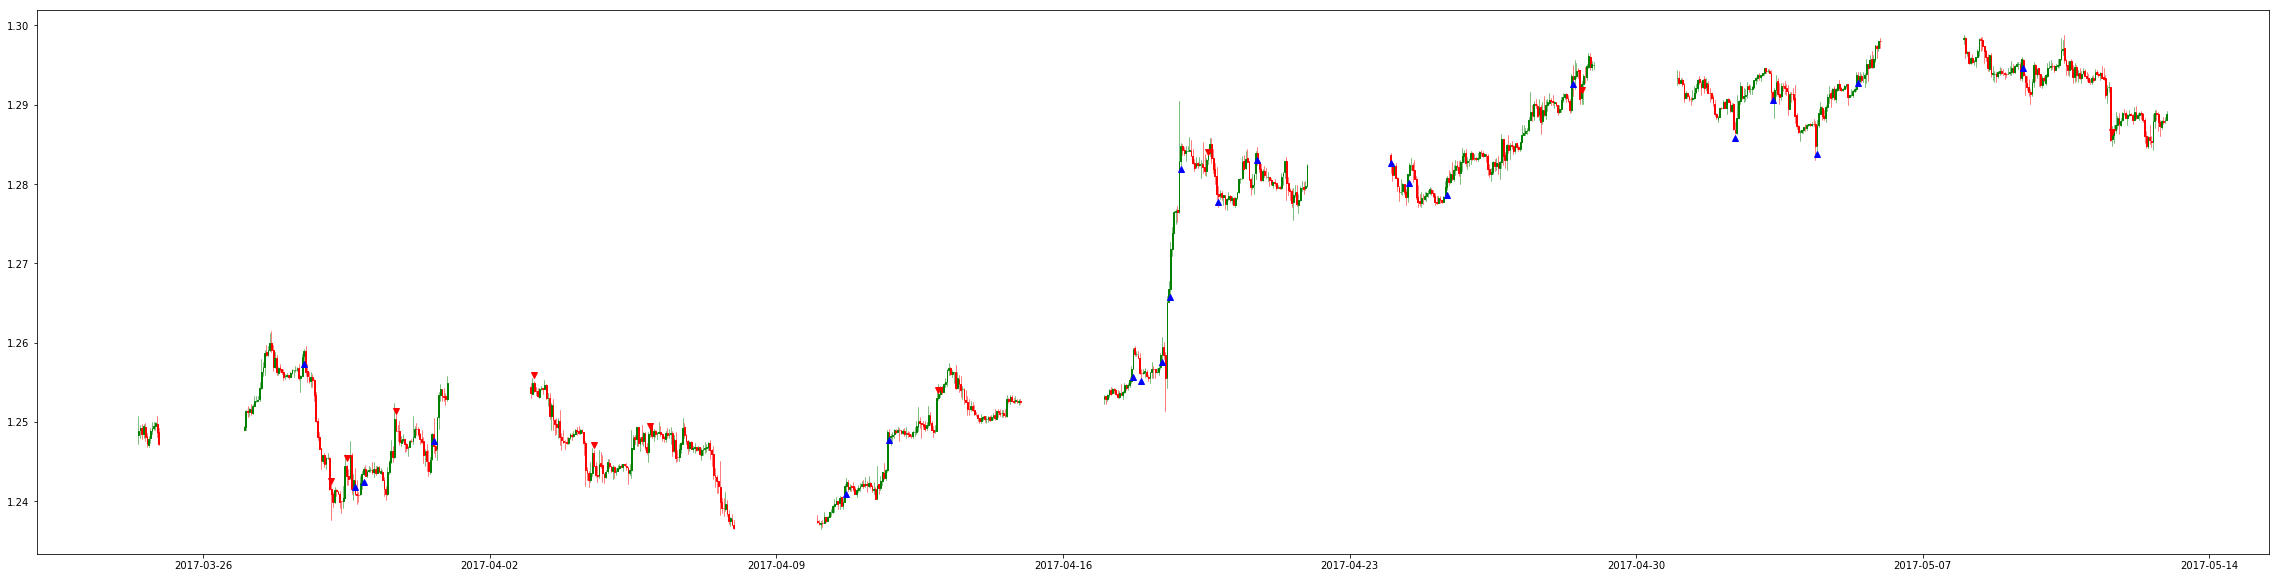

In [28]:
Q_learning._generate_summary_stats()

All trade entries are kept in env.portfolio.journal

In [ ]:
env.portfolio.journal